## 뉴스 기사 제목 + 해당 기사의 본문
- 네이버 증권 뉴스 탭 -> 주요 뉴스
- 해당 링크(pre_article_url)까지 크롤링

In [61]:
import re
import requests
from bs4 import BeautifulSoup

def crawl() :
    # 크롤링할 페이지 URL 설정
    origin_url = "https://finance.naver.com/news/mainnews.naver?&page="
    for page in range(1, 10) :
        url = origin_url + str(page)
    # 요청 시작
    response = requests.get(url)
    articles = []

    # HTTP 요청이 성공적인지 확인
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # 뉴스 기사 목록을 포함한 부분을 찾습니다.
        news_list = soup.find("ul", class_="newsList")

        # 뉴스 제목과 링크 수집
        news_articles = news_list.find_all("li")

        for article in news_articles:
            # 뉴스 제목 추출
            title = article.find("dd").text.strip()
            # 뉴스 본문 링크 가져오기
            article_link = article.find("a")["href"]

            # 뉴스 본문 페이지에 접근
            article_url = f"https://finance.naver.com{article_link}"
            pre_article_response = requests.get(article_url)
            pre_article_soup = BeautifulSoup(pre_article_response.text, "html.parser")
            href_url = pre_article_soup.find("script")
            
            url_pattern = re.compile(r'https://[^;'']+')
            match = url_pattern.search(href_url.text)
            if match :
                urls = match.group().rstrip("'")
                print("href_url", urls)
            new_article_url = urls
            pre_article_url = 'https://n.news.naver.com/mnews/article/009/0005191455'
            
            article_response = requests.get(new_article_url)
            article_soup = BeautifulSoup(article_response.text, "html.parser")
            if new_article_url == pre_article_url :     # 페이지 무시
                return
            if article_response.status_code == 200:
                article_soup = BeautifulSoup(article_response.text, "html.parser")
                
                # 뉴스 본문 추출 (articleCont 내부 텍스트만 추출)
                # print("스크립트", article_soup.find("div", id="newsct_article"))
                article_content = article_soup.find("div", id="newsct_article").get_text(separator=" ").strip()
                # print("아티클 콘텐츠", article_content)
                # 데이터 프레임 만들기 위한 제목, 본문
                articles.append (
                    {
                        "title": title,
                        "content": article_content
                    }
                )
            else:
                print(f"뉴스 본문 페이지에 접근할 수 없습니다: {article_url}")
    else:
        print("페이지를 가져올 수 없습니다.")
    return articles
articles = crawl()

href_url https://n.news.naver.com/mnews/article/014/0005077699
href_url https://n.news.naver.com/mnews/article/023/0003789824
href_url https://n.news.naver.com/mnews/article/417/0000950993
href_url https://n.news.naver.com/mnews/article/469/0000762282
href_url https://n.news.naver.com/mnews/article/009/0005191297
직전 아티클 [{'title': '고금리 사이클, 가시방석 ELS 투자자들[fn마켓워치]', 'content': '[파이낸셜뉴스] 고금리 사이클이 장기화될 것이란 전망에 주가연계증권(ELS) 투자자들의 근심도 더해지고 있다. 원금손실구간에 들어간 상당규모의 ELS가 조기상환에 실패해 만기를 기다리고 있지만 주가하락 악재가 쌓여 만기에 손실 가능성이 커지고 있어서다.       \n \n \n \n (출처=뉴시스/NEWSIS) /사진=뉴시스   25일(이하 현지시간) KIS자산평가에 따르면 홍콩항셍중국기업지수(H 지수) 연계 ELS 중 녹인 배리어(원금손실한계선)을 터치한 상품 잔액은 이달 기준 총 5조6711억원으로 집계됐다. 총 발행 잔액 10조원의 절반 수준이다.     S&P 연계 ELS에서 녹인 배리어를 터치한 상품 잔액은 약 5조824억원, 유로스톡스 연계 ELS에서는 4조6817억원, 코스피200 연계 ELS에서는 1조2343억원 규모다.     ELS는 계약만기일까지 기초자산 가격이 정해진 수준 아래로 떨어지지 않으면 원금과 고금리의 이자를 주는 파생상품이다. 이 지수가 녹인 배리어를 터치한 경우 투자자들이 만기까지 ELS를 보유해야 할 가능성이 높고 만기가 되더라도 원금손실이 날 우려가 크다.     문제는 고금리 상황이 계속되면서 주가지수 회복이 더뎌질 것으로 예상되고 있다는 점이다. 만기에

In [62]:
import pandas as pd

df = pd.DataFrame(articles)
df

,title,content
0,"고금리 사이클, 가시방석 ELS 투자자들[fn마켓워치]",[파이낸셜뉴스] 고금리 사이클이 장기화될 것이란 전망에 주가연계증권(ELS) 투자자...
1,‘한국의 작은 버핏’ 별명… 20년 운영 펀드 14배 올라,최준철 VIP자산운용 공동대표 \n \n \n \n ‘한국의 작은 버핏’이란 별명으...
2,"인스웨이브시스템즈, 코스닥 입성… ""디지털 전환 선도 기업 목표""",인스웨이브시스템즈가 코스닥 시장에 상장한다./사진=이미지투데이 소프트웨어 개발기...
3,[단독] 한은 지역인재 선발 '낙제점'... 목표비율 달성 13년간 2번뿐,"""지역 인재 20% 선발"" 유명무실 '인서울' 직원 87%, 'SKY'는 59% \..."
4,강성묵 하나증권 대표이사 ‘수산물 소비·어촌 휴가 장려 챌린지’ 참여,강성묵 하나증권 대표이사(가운데)와 하나증권 임직원들이 ‘수산물 소비 및 어촌 휴...


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5 non-null      object
 1   content  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [64]:
df.head()

,title,content
0,"고금리 사이클, 가시방석 ELS 투자자들[fn마켓워치]",[파이낸셜뉴스] 고금리 사이클이 장기화될 것이란 전망에 주가연계증권(ELS) 투자자...
1,‘한국의 작은 버핏’ 별명… 20년 운영 펀드 14배 올라,최준철 VIP자산운용 공동대표 \n \n \n \n ‘한국의 작은 버핏’이란 별명으...
2,"인스웨이브시스템즈, 코스닥 입성… ""디지털 전환 선도 기업 목표""",인스웨이브시스템즈가 코스닥 시장에 상장한다./사진=이미지투데이 소프트웨어 개발기...
3,[단독] 한은 지역인재 선발 '낙제점'... 목표비율 달성 13년간 2번뿐,"""지역 인재 20% 선발"" 유명무실 '인서울' 직원 87%, 'SKY'는 59% \..."
4,강성묵 하나증권 대표이사 ‘수산물 소비·어촌 휴가 장려 챌린지’ 참여,강성묵 하나증권 대표이사(가운데)와 하나증권 임직원들이 ‘수산물 소비 및 어촌 휴...


In [65]:
df.to_csv('news_data.csv', index=False)

## 형태소 분석
- 명사만 추출하기

In [69]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached JPype1-1.4.1-cp311-cp311-win_amd64.whl (345 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from konlpy.tag import Okt
from tqdm import tqdm

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5 non-null      object
 1   content  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [72]:
df.dropna(inplace=True)

In [74]:
okt = Okt()
poss_dic = {}

for i in tqdm(df.index):
    # 1. (형태소, 품사) 형식의 튜플들로 분리하는 품사 태깅의 작업을 하여 리스트로 저장
    content = df.loc[i, "content"]
    content = str(content)
    poss = okt.pos(content, norm=True, stem=True)

    # 2. 명사인 것만 poss_lst에 저장 (1글자인 단어는 제외)
    poss_lst = []
    for word, tag in poss:
        if tag in ['Noun'] and len(word) > 1:
            poss_lst.append(word)

    # 3. 기사의 인덱스를 key로 갖고 본문을 형태소 단위로 분리한 리스트를 value
    poss_dic[i] = poss_lst


100%|██████████| 5/5 [00:00<00:00, 14.20it/s]


In [13]:
poss_dic

{0: ['매도',
  '상위',
  '이차전지',
  '대거',
  '포함',
  '주가',
  '상승',
  '과도',
  '평가',
  '서울',
  '종로구',
  '연합인포맥스',
  '스크린',
  '에코',
  '프로',
  '차트',
  '사진',
  '출처',
  '연합뉴스',
  '이차전지',
  '기업',
  '주가',
  '내리막',
  '외국인',
  '투자자',
  '이차전지',
  '기업',
  '줄줄이',
  '때문',
  '대형',
  '이차전지',
  '종목',
  '주가',
  '하락',
  '베팅',
  '등장',
  '투자자',
  '고심',
  '모습',
  '증권',
  '지난',
  '외국인',
  '투자자',
  '국내',
  '증시',
  '매도',
  '외국인',
  '지난',
  '국내',
  '증시',
  '어치',
  '기간',
  '외인',
  '하이닉스',
  '어치',
  '매도',
  '에코',
  '프로',
  '에너지',
  '솔루션',
  '에코',
  '프로비',
  '홀딩스',
  '매도',
  '집계',
  '외국인',
  '매도',
  '상위',
  '종목',
  '이차전지',
  '기업',
  '이름',
  '주목',
  '지난달',
  '에코',
  '프로',
  '어치',
  '러브콜',
  '외국인',
  '투자자',
  '투자',
  '심리',
  '불과',
  '원료',
  '가격',
  '하락',
  '호적',
  '환경',
  '변화',
  '때문',
  '나이스',
  '신용',
  '평가',
  '가격',
  '설정',
  '탄산',
  '리튬',
  '가격',
  '지난해',
  '올해',
  '밑도',
  '수준',
  '분석',
  '기준',
  '적용',
  '니켈',
  '기동',
  '현재',
  '가격',
  '수준',
  '여기',
  '중국',
  '기반',
  '공급',
  '사슬',
  '불안',
  '정성',
  '확대',
  '전기차',
  '시장

In [14]:
import pandas as pd

# poss_dic 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(poss_dic, orient='index')

# CSV 파일로 저장 (index는 저장하지 않음)
df.to_csv('news_word_data.csv', index=False)


## 불용어 처리

In [15]:
pip install konlpy

In [16]:
from konlpy.tag import Komoran

In [17]:
all_words = []

for words in poss_dic.values():
    all_words.extend(words)
    all_words = list(all_words)

In [18]:
print(all_words)

['매도', '상위', '이차전지', '대거', '포함', '주가', '상승', '과도', '평가', '서울', '종로구', '연합인포맥스', '스크린', '에코', '프로', '차트', '사진', '출처', '연합뉴스', '이차전지', '기업', '주가', '내리막', '외국인', '투자자', '이차전지', '기업', '줄줄이', '때문', '대형', '이차전지', '종목', '주가', '하락', '베팅', '등장', '투자자', '고심', '모습', '증권', '지난', '외국인', '투자자', '국내', '증시', '매도', '외국인', '지난', '국내', '증시', '어치', '기간', '외인', '하이닉스', '어치', '매도', '에코', '프로', '에너지', '솔루션', '에코', '프로비', '홀딩스', '매도', '집계', '외국인', '매도', '상위', '종목', '이차전지', '기업', '이름', '주목', '지난달', '에코', '프로', '어치', '러브콜', '외국인', '투자자', '투자', '심리', '불과', '원료', '가격', '하락', '호적', '환경', '변화', '때문', '나이스', '신용', '평가', '가격', '설정', '탄산', '리튬', '가격', '지난해', '올해', '밑도', '수준', '분석', '기준', '적용', '니켈', '기동', '현재', '가격', '수준', '여기', '중국', '기반', '공급', '사슬', '불안', '정성', '확대', '전기차', '시장', '성장기', '진입', '가격', '중요성', '부각', '경기', '위축', '구매력', '저하', '환경', '변화', '전기차', '이차전지', '대한', '수요', '증가', '과거', '대비', '부정', '관측', '외국인', '도세', '리튬', '가격', '하락', '기록', '이차전지', '기업', '주가', '뒷걸음질', '에코', '프로', '거래', '대비', '하락', '에코', '프로비', '홀딩스'

In [19]:
stop_words = [
"시장", "증권", "주가", "배당", "기업",
"투자", "지난", "국내", "올해", "상승",
"금리", "기업", "상장", "가격", "이후",
"주식", "수익", "거래", "투자자", "오늘",
"내일", "어제", "하락", "지수", "증시",
"인상", " 대비", "예상", "지난해", "수준",
"경제", "이번", "주주", "마감", "최근",
"종목", "결정", "설명", "상황", "이익",
"발표", "현재", "다만", "흐름", "대비",
"전망", "가능성", "실적", "상반기", "정부",
"시간", "사업", "오전", "위해", "소식",
"비중", "코스피", "코스닥", "기록", "라며",
"글로벌", "우리", "영향", "이유", "요인",
"성장", "기술", "최대", "최소", "경기",
"시작", "때문", "매각", "제품", "개선",
"주요", "대한", "통해", "지속", "재건",
"우려", "수출", "업체", "세계", "산업",
"우려", "은행", "손실","가운데", "가치",
"사무실", "업종", "장비", "매출", "공매도",
"회사", "공개", "그룹", "증가", "또한",
"한편", "대표", "설계", "전략", "신규",
"향후", "차이나", "감소", "당시", "자금",
"가장", "참여", "판매", "보유", "기준",
"사진", "매수", "기대", "규모", "블랙",
"정책", "강세", "침체", "종가", "외국인",
"배당금", "이전", "기자", "주목", "연구원",
"편입" , "관련", "약세", "현상", "둔화",
"크게", "이상", "현지", "각각", "개월",
"계약", "회의", "생산", "추가", "만큼",
"대해", "경우", "준비", "수요", "상위"


]

In [20]:
from konlpy.tag import Komoran

# 형태소 분석기 초기화
komoran = Komoran()

def remove_stopwords(word_list):
    filtered_tokens = [word for word in word_list if word not in stop_words]
    return filtered_tokens

# 불용어 처리 예제
filtered_words = remove_stopwords(all_words)
print(filtered_words)

# tags = list(processed_article)

['매도', '이차전지', '대거', '포함', '과도', '평가', '서울', '종로구', '연합인포맥스', '스크린', '에코', '프로', '차트', '출처', '연합뉴스', '이차전지', '내리막', '이차전지', '줄줄이', '대형', '이차전지', '베팅', '등장', '고심', '모습', '매도', '어치', '기간', '외인', '하이닉스', '어치', '매도', '에코', '프로', '에너지', '솔루션', '에코', '프로비', '홀딩스', '매도', '집계', '매도', '이차전지', '이름', '지난달', '에코', '프로', '어치', '러브콜', '심리', '불과', '원료', '호적', '환경', '변화', '나이스', '신용', '평가', '설정', '탄산', '리튬', '밑도', '분석', '적용', '니켈', '기동', '여기', '중국', '기반', '공급', '사슬', '불안', '정성', '확대', '전기차', '성장기', '진입', '중요성', '부각', '위축', '구매력', '저하', '환경', '변화', '전기차', '이차전지', '과거', '부정', '관측', '도세', '리튬', '이차전지', '뒷걸음질', '에코', '프로', '에코', '프로비', '홀딩스', '일각', '이차전지', '주의', '과도', '보고', '분석', '버스', '합성', '해당', '대형', '이차전지', '베팅', '해당', '집계', '개인', '사흘', '연속', '해당', '첫날', '무려', '어치', '오션', '플랜트', '제공', '재판매', '금지', '파이낸셜뉴스', '해상', '풍력', '오스', '테드', '부품', '공급', '여파', '보이', '이슈', '마냥', '부정', '이지', '판단', '한국', '거래소', '오션', '플랜트', '풍력발전', '부품', '에스', '베어링', '에스', '윈드', '상반', '모습', '지난달', '상태', '해상', '풍력', '일제', '해상', '풍력',

In [21]:
from collections import Counter

count = Counter(filtered_words)
tags = count.most_common(50)
tags[:50]

[('중국', 184),
 ('미국', 116),
 ('반도체', 92),
 ('한국', 69),
 ('평가', 65),
 ('달러', 59),
 ('개인', 56),
 ('펀드', 49),
 ('현대', 48),
 ('청약', 48),
 ('삼성', 45),
 ('철강', 45),
 ('공모', 44),
 ('포스코', 43),
 ('수익률', 40),
 ('유지', 40),
 ('전자', 40),
 ('로보틱스', 40),
 ('일본', 39),
 ('기관', 37),
 ('동결', 37),
 ('목표', 37),
 ('우크라이나', 37),
 ('부품', 36),
 ('홀딩스', 35),
 ('회장', 35),
 ('유가', 35),
 ('두산', 35),
 ('진행', 34),
 ('매도', 33),
 ('분석', 33),
 ('서비스', 33),
 ('확대', 32),
 ('영업', 32),
 ('시가총액', 32),
 ('서울', 31),
 ('긍정', 30),
 ('자산', 30),
 ('업계', 29),
 ('테슬라', 29),
 ('프로', 28),
 ('통신', 28),
 ('수혜', 28),
 ('중이', 27),
 ('솔루션', 26),
 ('공급', 26),
 ('파업', 26),
 ('예측', 26),
 ('인도', 26),
 ('에코', 25)]

## 워드 클라우드 생성
- 한글 깨짐 이슈 : 폰트 설치해서 적용할 것

In [22]:
!apt-get update -qq
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 32 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

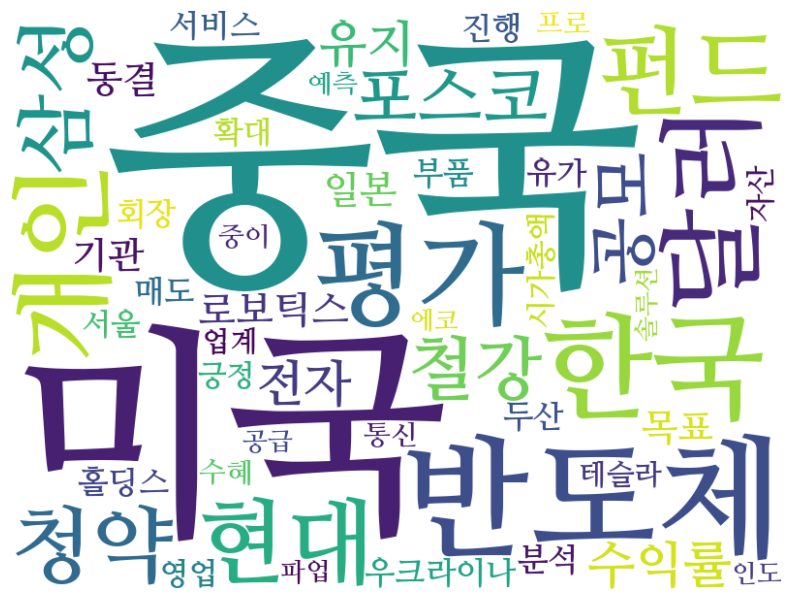

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager, rc

# 나눔 폰트 경로 설정
font_location = "/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# tags 리스트를 사전으로 변환
word_freq = {}
for tag in tags:
    word, freq = tag[0], tag[1]
    word_freq[word] = freq

# 워드 클라우드 설정
wc = WordCloud(font_path=font_location, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_freq)

# 워드 클라우드를 화면에 표시
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
